Running the example, the accuracy on the training and validation test is printed
each epoch and at the end of the classification error rate is printed.

Note: Your results may vary given the stochastic nature of the algorithm or
evaluation procedure, or differences in numerical precision. Consider running the example
a few times and compare the average outcome.

Epochs may take about 45 seconds to run on the GPU (e.g. on AWS).
You can see that the network achieves an error rate of 0.95%, which is better than
our simple multi-layer perceptron model above.

In [1]:
# Simple CNN for the MNIST Dataset
from keras.datasets import fashion_mnist , mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import random
import numpy as np
import cv2

In [2]:
# define a simple CNN model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
	model.add(MaxPooling2D())
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(64, activation='relu'))
	model.add(Dense(nClasses, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam',
               metrics=['accuracy'])
	return model

In [3]:
def plotSamples(data,rows,cols,tLabels,names,pLabels=[]):
    fig, axs = plt.subplots(rows,cols)
    nDigits = data.shape[0]
    for i in range(rows):
        for j in range(cols):
            index = random.randint(0,nDigits-1)
            axs[i,j].imshow(data[index],cmap = 'gray')
            # remove axes titles
            axs[i,j].axis('off')
            if (np.any(pLabels)):
                axs[i,j].set_title('P: %s, T: %s' % (names[pLabels[index]], names[tLabels[index]]) ,fontdict={'fontsize': 10})
            else:
                axs[i,j].set_title('T: %s' % names[tLabels[index]],fontdict={'fontsize': 10})
            # show the figure
    plt.show()

In [4]:
def plotTrainingCurves(history,numEpochs):
  #Process ploting
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_accuracy'])
  plt.plot(history.history['val_loss'])
  plt.axis([0,numEpochs,0,1])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Accuracy','loss','val_accuracy','val_loss'])
  plt.show()

In [5]:
# load data
(trainData, trainLabels), (testData, testLabels) = fashion_mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainData.shape, trainLabels.shape))
print('Test: X=%s, y=%s' % (testData.shape, testLabels.shape))

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [6]:
names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

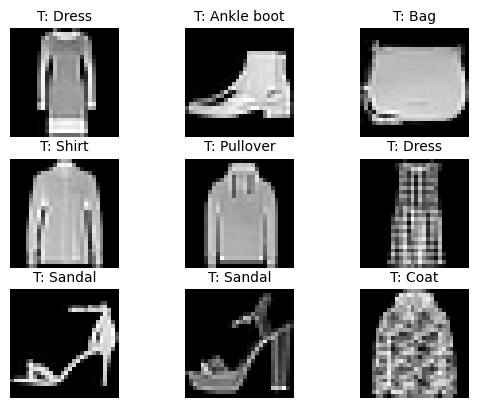

In [7]:
rows = 3
cols = 3
plotSamples(trainData,rows,cols,trainLabels,names)

In [8]:
# reshape to be [samples][width][height][channels]
trainData = trainData.reshape((trainData.shape[0], 28, 28, 1)).astype('float32')
testData = testData.reshape((testData.shape[0], 28, 28, 1)).astype('float32')

In [9]:
# one hot encode outputs
catTrainLabels = to_categorical(trainLabels)
catTestLabels = to_categorical(testLabels)
XtrainData = trainData/255.0
XtestData = testData/255.0
nClasses = catTestLabels.shape[1]

In [10]:
# build the model
model = baseline_model()
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       294,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 296,458 (1.13 MB)

 Trainable params: 296,458 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Fit the model
nEpochs = 6
history=model.fit(XtrainData, catTrainLabels,
                  validation_data=(XtestData, catTestLabels),
                  epochs=nEpochs, batch_size=200)

Epoch 1/6
300/300 ━━━━━━━━━━━━━━━━━━━━ 23s 72ms/step - accuracy: 0.7335 - loss: 0.7755 - val_accuracy: 0.8607 - val_loss: 0.4026
Epoch 2/6
300/300 ━━━━━━━━━━━━━━━━━━━━ 41s 72ms/step - accuracy: 0.8663 - loss: 0.3796 - val_accuracy: 0.8758 - val_loss: 0.3549
Epoch 3/6
300/300 ━━━━━━━━━━━━━━━━━━━━ 24s 80ms/step - accuracy: 0.8849 - loss: 0.3239 - val_accuracy: 0.8836 - val_loss: 0.3241
Epoch 4/6
300/300 ━━━━━━━━━━━━━━━━━━━━ 39s 73ms/step - accuracy: 0.8941 - loss: 0.2974 - val_accuracy: 0.8960 - val_loss: 0.3012
Epoch 5/6
300/300 ━━━━━━━━━━━━━━━━━━━━ 22s 73ms/step - accuracy: 0.8986 - loss: 0.2791 - val_accuracy: 0.8967 - val_loss: 0.2883
Epoch 6/6
300/300 ━━━━━━━━━━━━━━━━━━━━ 40s 70ms/step - accuracy: 0.9045 - loss: 0.2655 - val_accuracy: 0.8907 - val_loss: 0.3094


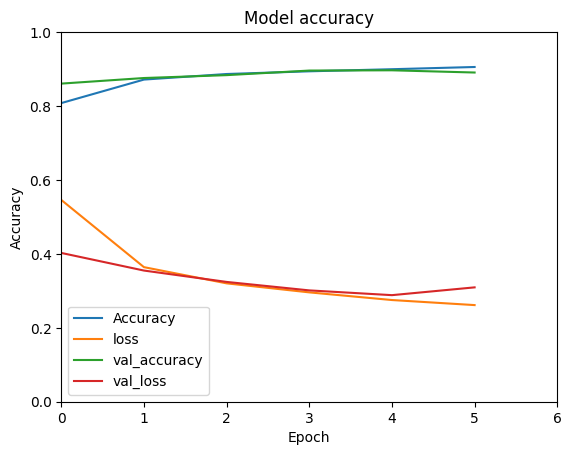

In [12]:
#Process ploting
plotTrainingCurves(history,nEpochs)

In [13]:
# Final evaluation of the model
scores = model.evaluate(testData, catTestLabels, verbose=0)
print("CNN validation accuracy: %.2f" % scores[1])

CNN validation accuracy: 0.87


In [14]:
#make  predictions
predLabels = model.predict(testData).argmax(1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


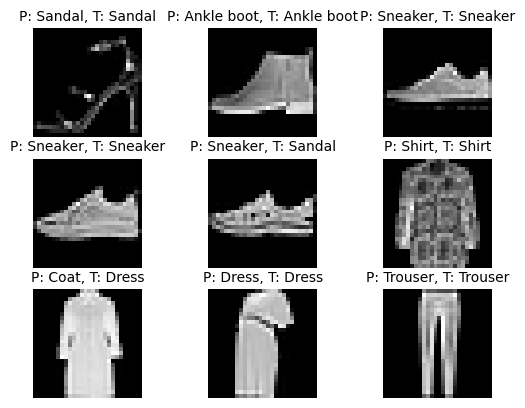

In [15]:
# plot predictions of random 9 test images
plotSamples(testData,rows,cols,testLabels,names,predLabels)

task 1

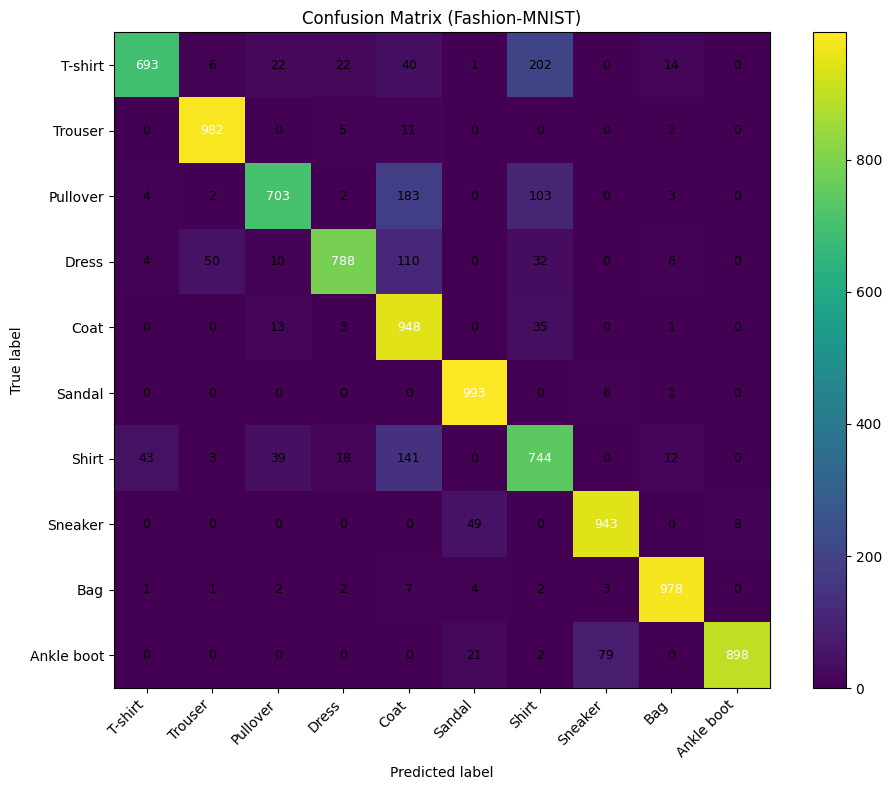


% Prediction error per class:
 0 - T-shirt     :  30.70%   (correct=693, total=1000)
 1 - Trouser     :   1.80%   (correct=982, total=1000)
 2 - Pullover    :  29.70%   (correct=703, total=1000)
 3 - Dress       :  21.20%   (correct=788, total=1000)
 4 - Coat        :   5.20%   (correct=948, total=1000)
 5 - Sandal      :   0.70%   (correct=993, total=1000)
 6 - Shirt       :  25.60%   (correct=744, total=1000)
 7 - Sneaker     :   5.70%   (correct=943, total=1000)
 8 - Bag         :   2.20%   (correct=978, total=1000)
 9 - Ankle boot  :  10.20%   (correct=898, total=1000)


In [16]:
import numpy as np
import matplotlib.pyplot as plt


cm = np.zeros((nClasses, nClasses), dtype=int)
for t, p in zip(testLabels, predLabels):
    cm[int(t), int(p)] += 1


plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix (Fashion-MNIST)")
plt.colorbar()
ticks = np.arange(nClasses)
plt.xticks(ticks, names, rotation=45, ha="right")
plt.yticks(ticks, names)
plt.xlabel("Predicted label")
plt.ylabel("True label")


thresh = cm.max() * 0.6
for i in range(nClasses):
    for j in range(nClasses):
        plt.text(j, i, str(cm[i, j]),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=9)

plt.tight_layout()
plt.show()

print("\n% Prediction error per class:")
for i in range(nClasses):
    total_true = cm[i, :].sum()
    correct = cm[i, i]
    error_pct = 0.0 if total_true == 0 else (1 - (correct / total_true)) * 100
    print(f"{i:>2} - {names[i]:<12}: {error_pct:6.2f}%   (correct={correct}, total={total_true})")

task 2

In [17]:
def baseline_model_2conv():

	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
	model.add(MaxPooling2D())


	model.add(Conv2D(32, (3, 3), activation='relu'))
	model.add(MaxPooling2D())

	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(64, activation='relu'))
	model.add(Dense(nClasses, activation='softmax'))

	model.compile(loss='categorical_crossentropy', optimizer='adam',
               metrics=['accuracy'])
	return model

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,994 (242.16 KB)

 Trainable params: 61,994 (242.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
300/300 ━━━━━━━━━━━━━━━━━━━━ 27s 86ms/step - accuracy: 0.6492 - loss: 0.9981 - val_accuracy: 0.8328 - val_loss: 0.4596
Epoch 2/6
300/300 ━━━━━━━━━━━━━━━━━━━━ 28s 92ms/step - accuracy: 0.8385 - loss: 0.4481 - val_accuracy: 0.8655 - val_loss: 0.3804
Epoch 3/6
300/300 ━━━━━━━━━━━━━━━━━━━━ 40s 87ms/step - accuracy: 0.8660 - loss: 0.3743 - val_accuracy: 0.8727 - val_loss: 0.3518
Epoch 4/6
300/300 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.8743 - loss: 0.3483 - val_accuracy: 0.8796 - val_loss: 0.3322
Epoch 5/6
300/300 ━━━━━━━━━━━━━━━━━━━━ 45s 100ms/step - accuracy: 0.8821 - loss: 0.3276 - val_accuracy: 0.8869 - val_loss: 0.3107
Epoch 6/6
300/300 ━━━━━━━━━━━━━━━━━━━━ 36s 84ms/step - accuracy: 0.8889 - loss: 0.3072 - val_accuracy: 0.8917 - val_loss: 0.2995


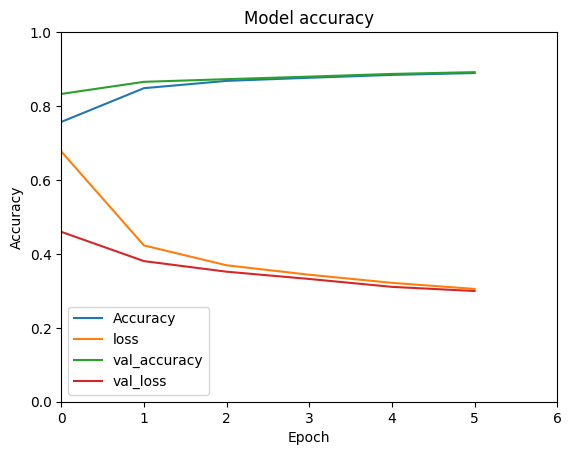

CNN(2conv) validation accuracy: 0.88


In [18]:

model2 = baseline_model_2conv()
model2.summary()


nEpochs = 6
history2 = model2.fit(XtrainData, catTrainLabels,
                  validation_data=(XtestData, catTestLabels),
                  epochs=nEpochs, batch_size=200)

plotTrainingCurves(history2, nEpochs)


scores2 = model2.evaluate(testData, catTestLabels, verbose=0)
print("CNN(2conv) validation accuracy: %.2f" % scores2[1])

task 3

In [20]:
predLabels2 = model2.predict(testData).argmax(1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


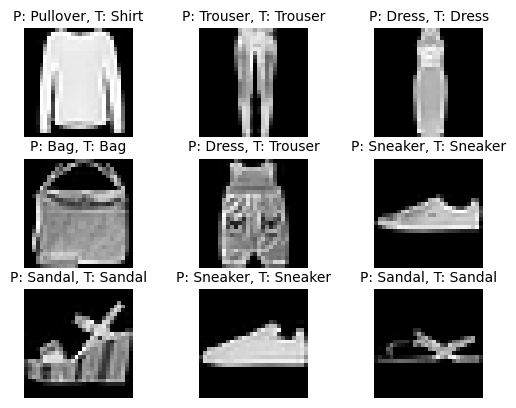

In [21]:
plotSamples(testData, rows, cols, testLabels, names, predLabels2)

task 6

MNIST Train: (60000, 28, 28) (60000,)
MNIST Test : (10000, 28, 28) (10000,)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       294,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 296,458 (1.13 MB)

 Trainable params: 296,458 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/6
300/300 ━━━━━━━━━━━━━━━━━━━━ 23s 75ms/step - accuracy: 0.8427 - loss: 0.5690 - val_accuracy: 0.9682 - val_loss: 0.1047
Epoch 2/6
300/300 ━━━━━━━━━━━━━━━━━━━━ 40s 71ms/step - accuracy: 0.9704 - loss: 0.0994 - val_accuracy: 0.9798 - val_loss: 0.0651
Epoch 3/6
300/300 ━━━━━━━━━━━━━━━━━━━━ 41s 71ms/step - accuracy: 0.9811 - loss: 0.0628 - val_accuracy: 0.9844 - val_loss: 0.0473
Epoch 4/6
300/300 ━━━━━━━━━━━━━━━━━━━━ 42s 75ms/step - accuracy: 0.9850 - loss: 0.0494 - val_accuracy: 0.9857 - val_loss: 0.0432
Epoch 5/6
300/300 ━━━━━━━━━━━━━━━━━━━━ 40s 72ms/step - accuracy: 0.9872 - loss: 0.0408 - val_accuracy: 0.9872 - val_loss: 0.0374
Epoch 6/6
300/300 ━━━━━━━━━━━━━━━━━━━━ 21s 70ms/step - accuracy: 0.9901 - loss: 0.0336 - val_accuracy: 0.9867 - val_loss: 0.0366


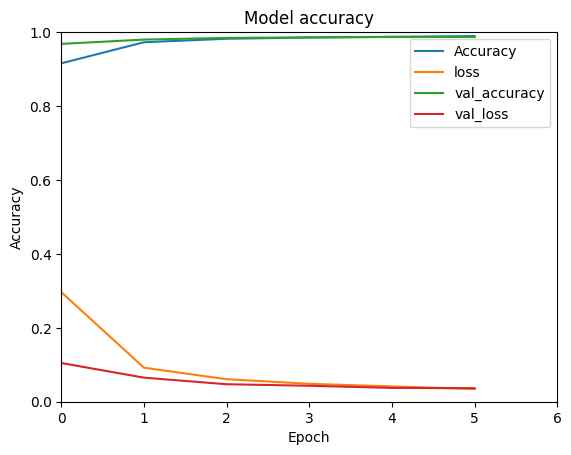

MNIST CNN validation accuracy: 0.99


In [24]:
(trainData_m, trainLabels_m), (testData_m, testLabels_m) = mnist.load_data()

print('MNIST Train:', trainData_m.shape, trainLabels_m.shape)
print('MNIST Test :', testData_m.shape, testLabels_m.shape)


trainData_m = trainData_m.reshape((trainData_m.shape[0], 28, 28, 1)).astype('float32')
testData_m  = testData_m.reshape((testData_m.shape[0], 28, 28, 1)).astype('float32')


XtrainData_m = trainData_m / 255.0
XtestData_m  = testData_m / 255.0


catTrainLabels_m = to_categorical(trainLabels_m)
catTestLabels_m  = to_categorical(testLabels_m)


nClasses = catTestLabels_m.shape[1]


model_mnist = baseline_model()
model_mnist.summary()

nEpochs = 6
history_mnist = model_mnist.fit(
    XtrainData_m, catTrainLabels_m,
    validation_data=(XtestData_m, catTestLabels_m),
    epochs=nEpochs,
    batch_size=200
)
plotTrainingCurves(history_mnist, nEpochs)

scores_mnist = model_mnist.evaluate(XtestData_m, catTestLabels_m, verbose=0)
print("MNIST CNN validation accuracy: %.2f" % scores_mnist[1])



task 7

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


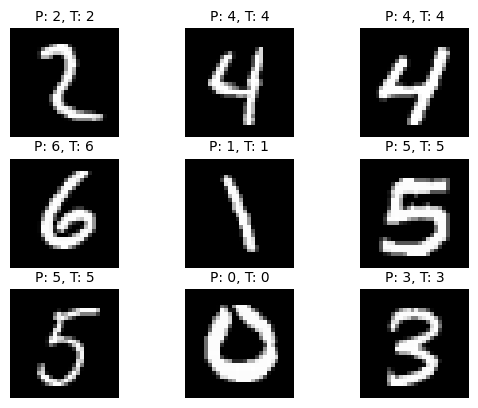

In [23]:

predLabels_mnist = model_mnist.predict(XtestData_m).argmax(1)

# Show 9 random test images with TRUE and PREDICTED labels
plotSamples(
    testData_m.squeeze(),
    rows, cols,
    testLabels_m,
    names=[str(i) for i in range(10)],  # digit names 0–9
    pLabels=predLabels_mnist
)

task 10

In [59]:
def predict_and_plot_saved_digit(digit, model_to_use, show=True):
    filename = f"{digit}.jpg"

    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Could not read file:", filename)
        return None, None

    img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_AREA)
    img_f = img.astype("float32")

    if img_f.mean() > 127:
        img_f = 255.0 - img_f

    img_norm = img_f / 255.0
    x = img_norm.reshape(1, 28, 28, 1)

    pred = model_to_use.predict(x, verbose=0).argmax(1)[0]

    if show:
        plt.figure(figsize=(3,3))
        plt.imshow(img_norm, cmap="gray")
        plt.axis("off")
        plt.title(f"True: {digit}   Pred: {pred}")
        plt.show()
    return img_norm, pred

task 11

In [76]:
def predict_and_plot_number(number, model_to_use):
    digits = list(str(number))
    images = []
    predictions = []

    for d in digits:
        img, pred = predict_and_plot_saved_digit(d, model_to_use, show=False)
        if img is None:
            return
        images.append(img)
        predictions.append(pred)

    concat_img = np.hstack(images)

    # Plot the full number
    plt.figure(figsize=(len(digits) * 2, 2))
    plt.imshow(concat_img, cmap="gray")
    plt.axis("off")
    plt.title(f"Input number: {number} | Predicted digits: {predictions}")
    plt.show()


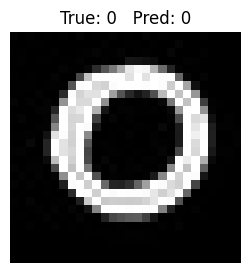

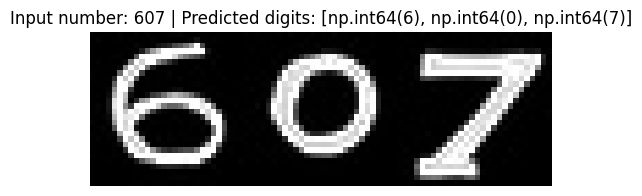

In [77]:
# Task 10 (single digit)
predict_and_plot_saved_digit(0, model_mnist)

# Task 11 (multi-digit number using Task 10)
predict_and_plot_number(607, model_mnist)

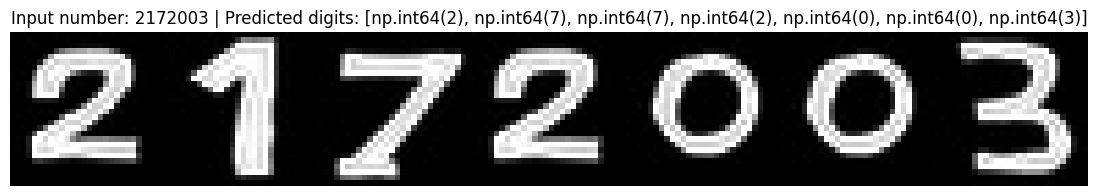

In [78]:
predict_and_plot_number(2172003, model_mnist)
